<a href="https://colab.research.google.com/github/yasirabd/research-diagnostic-turbine/blob/main/Health_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Create: 7 January 2022*<br>
*Last Update: 7 January 2022*<br>
*Author: Yasir Abdur Rohman*<br>
**Property of PT Indonesia Power & Lab Getaran & Diagnosis Mesin Undip**

---

# Problem Description

Implement these concepts:
- https://www.ge.com/digital/documentation/predix-apm/latest/ahm-health-indicator.html
- https://www.ge.com/digital/documentation/predix-apm/latest/ahm-health-summary-statuses.html

# Import Libraries

In [ ]:
!pip install plotly==5.4.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

# Dataset

In [ ]:
path = "/content/drive/MyDrive/Prescriptive Maintenance/Data/Turbine Generator - SLA5/export_datasla5_01ags21-31okt21.csv"
data = pd.read_csv(path)
data.shape

(132479, 85)

In [ ]:
# slice data
cols = ['Generator Gross Capacity',
        'Turbine Lube Oil Cooler Outlet Temperature',
        'Turbine Bearing #01 Metal Temperature',
        'Turbine.Bearing 1 Metal Temperature',
        'Turbine.Bearing Oil Pressure',
        'Turbine.Bearing 1 Drain Oil Temperature']

data = data[['date']+cols]

# sort by index
data = data.sort_values(by='date').reset_index(drop=True)

# convert date to datetime
data['date'] = pd.to_datetime(data['date'])

data.head()

date  ...  Turbine.Bearing 1 Drain Oil Temperature
0 2021-08-01 00:00:00  ...                                51.465816
1 2021-08-01 00:01:00  ...                                51.453390
2 2021-08-01 00:02:00  ...                                51.440964
3 2021-08-01 00:03:00  ...                                51.428535
4 2021-08-01 00:04:00  ...                                51.416110

[5 rows x 7 columns]

# Status Criteria

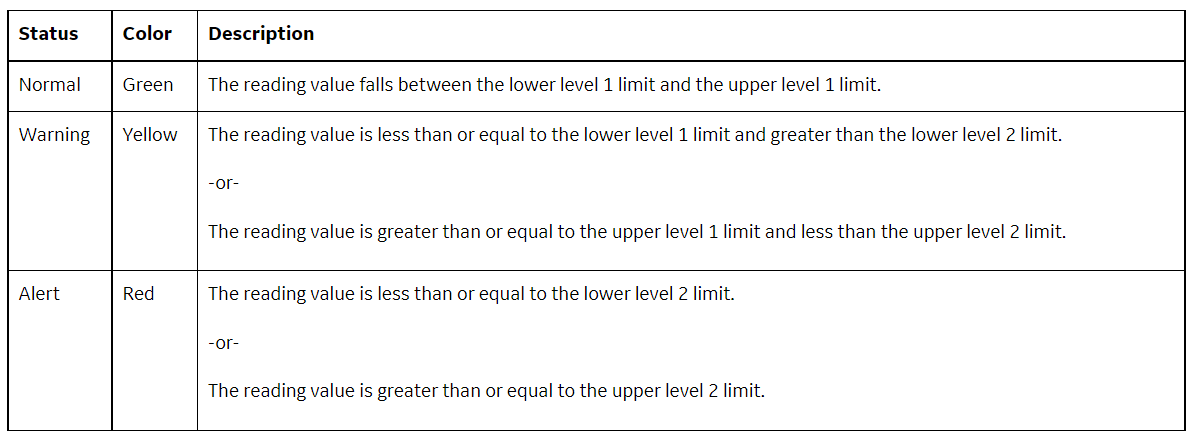

For example, consider the following Measurement Location limit values:

- Upper Level 3 = 140
- Upper Level 2 = 130
- Upper Level 1 = 120
- Lower Level 1 = 110
- Lower Level 2 = 100
- Lower Level 3 = 90

# Visualize

In [ ]:
sensor = "Generator Gross Capacity"
df = data[['date', sensor]]

In [ ]:
df.describe()

Generator Gross Capacity
count             126142.000000
mean                 540.086001
std                  136.240974
min                    0.000000
25%                  566.764975
50%                  584.516750
75%                  589.368427
max                  610.248900

In [ ]:
upper_lv3 = 590
upper_lv2 = 570
upper_lv1 = 550
lower_lv1 = 530
lower_lv2 = 510
lower_lv3 = 490

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['Generator Gross Capacity'],
                         mode='lines', name='Generator Gross Capacity'))

fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=upper_lv3, y1=upper_lv3,
              line=dict(color='#EF553B'), layer='below')
fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=upper_lv2, y1=upper_lv2,
              line=dict(color='#FECB52'), layer='below')
fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=upper_lv1, y1=upper_lv1,
              line=dict(color='#00CC96'), layer='below')
fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=lower_lv1, y1=lower_lv1,
              line=dict(color='#00CC96'), layer='below')
fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=lower_lv2, y1=lower_lv2,
              line=dict(color='#FECB52'), layer='below')
fig.add_shape(type='line', 
              x0=min(df['date']), x1=max(df['date']), 
              y0=lower_lv3, y1=lower_lv3,
              line=dict(color='#EF553B'), layer='below')

fig.update_layout(title='Generator Gross Capacity')
fig.show()